<a href="https://colab.research.google.com/github/leksangpelkey/dataproject/blob/main/Dataproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import Libraries

In [1]:
import pandas as pd   

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

# Load dataset

In [8]:
df = pd.read_csv('https://raw.githubusercontent.com/leksangpelkey/dataproject/main/911.csv')

In [9]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [10]:
#How many rows and columns in dataset?
df.shape

(99492, 9)

In [15]:
# how many null values are present in each column
df.isnull().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

In [17]:
# What are the top 10 zipcodes for 911 calls?
df['zip'].value_counts().head(10)

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
19002.0    3050
19468.0    2990
19454.0    2781
19090.0    2635
19038.0    2578
Name: zip, dtype: int64

In [20]:
#What are the bottom 10 zipcodes for 911 calls?
df['zip'].value_counts().tail(10)

19138.0    2
17752.0    1
36107.0    1
19139.0    1
19490.0    1
19119.0    1
77316.0    1
19457.0    1
19107.0    1
19127.0    1
Name: zip, dtype: int64

In [18]:
#What are the top 10 townships (twp) for 911 calls?
df['twp'].value_counts().head(10)

LOWER MERION        8443
ABINGTON            5977
NORRISTOWN          5890
UPPER MERION        5227
CHELTENHAM          4575
POTTSTOWN           4146
UPPER MORELAND      3434
LOWER PROVIDENCE    3225
PLYMOUTH            3158
HORSHAM             3003
Name: twp, dtype: int64

In [21]:
#What are the bottom 10 township (twp) for 911 calls?
df['twp'].value_counts().tail(10)

LOWER FREDERICK    252
ROCKLEDGE          237
SCHWENKSVILLE      234
EAST GREENVILLE    217
HATFIELD BORO      199
BRYN ATHYN         173
SALFORD            163
GREEN LANE          51
PHILA COUNTY        43
LEHIGH COUNTY       30
Name: twp, dtype: int64

In [22]:
#How many unique title codes are there?
df['title'].nunique()

110

In [23]:
df['title'].head(5)

0     EMS: BACK PAINS/INJURY
1    EMS: DIABETIC EMERGENCY
2        Fire: GAS-ODOR/LEAK
3     EMS: CARDIAC EMERGENCY
4             EMS: DIZZINESS
Name: title, dtype: object

In the title column there is causes and department mentioned before the title code. These are EMS, Fire and Traffic. With use of .apply() with custom lambda expression to create a new column called 'Cause' that contains the these string value.

example: if the title column valus is  EMS: BACK PAINS/INJURY, the cause column value would be EMS

In [24]:
df['cause']= df['title'].apply(lambda title: title.split(':')[0])
df['cause']

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: cause, Length: 99492, dtype: object

In [25]:
df['cause'].value_counts().head()

EMS        48877
Traffic    35695
Fire       14920
Name: cause, dtype: int64

#Data Visualization

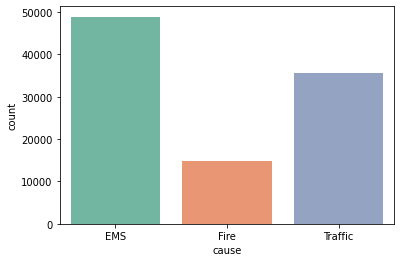

In [27]:
sns.countplot(x='cause', data= df, palette = 'Set2')

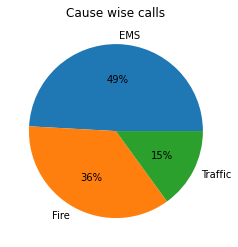

In [28]:
x=np.array(df['cause'].value_counts())
plt.pie(x, labels= df['cause'].unique(), autopct= '%.0f%%')
plt.title ('Cause wise calls')
plt.show()

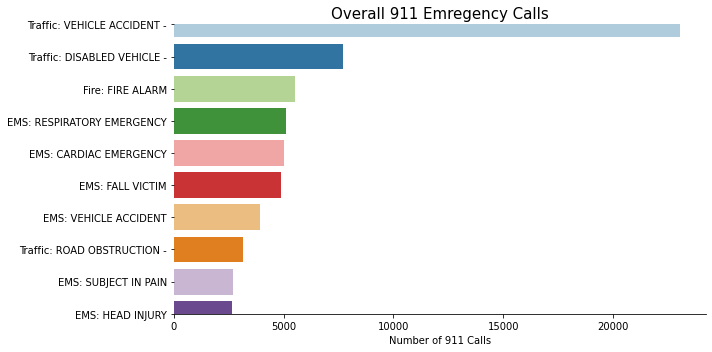

In [34]:
fig, axes = plt.subplots(figsize=(10, 5))
sns.countplot(y='title', data=df, order=df['title'].value_counts().index, palette="Paired")
sns.despine(bottom=False, left=True)
axes.set_ylim([9, 0])
axes.set_title('Overall 911 Emregency Calls', size=15)
axes.set(xlabel='Number of 911 Calls', ylabel='')
plt.tight_layout()

In [ ]:
#Checking the data type for timeStamp column

In [35]:
type(df['timeStamp'].iloc[0])

str

In [ ]:
#using pd.to_datetime to convert the column from string to DateTime objects.

In [36]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])

In [37]:
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [39]:
time = df['timeStamp'].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [40]:
#to take the specific hour of the particular datetime attribution
time.hour

17

In [43]:
#to take the specific day of week of the particular datetime attribution
time.dayofweek

3

In [41]:
#to take the specific month of the particular datetime attribution
time.month

12

In [42]:
#to take the specific year of the particular datetime attribution
time.year

2015

In [44]:
df['Hour']=df['timeStamp'].apply(lambda time :  time.hour)
df['Month']=df['timeStamp'].apply(lambda time :  time.month)
df['Day of Week']=df['timeStamp'].apply(lambda time :  time.dayofweek)

In [ ]:
#checking the dataframe after creating new columns of hour, month and day of week.

In [45]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [ ]:
#Observed: the 'day of week' column is in integer. use the .map( with this dictionary to map the actual string names to the day of the week.)

In [46]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [47]:
df['Day of Week']=df['Day of Week'].map(dmap)

In [50]:
#after changing the day of week from integer to actual name, now lets check dataframe

df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,cause,Hour,Month,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


In [ ]:
#using seaborn to create a countplot of the Day of week column with the hue based off of the Cause column

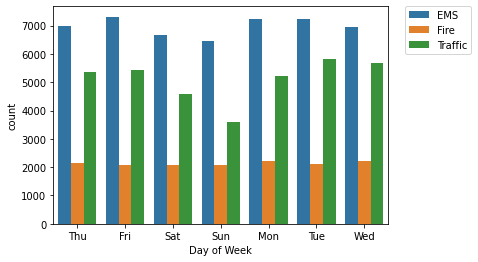

In [52]:
sns.countplot(x='Day of Week', data= df, hue='cause')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [ ]:
#using seaborn to create a countplot of the Month column with the hue based off of the Cause column

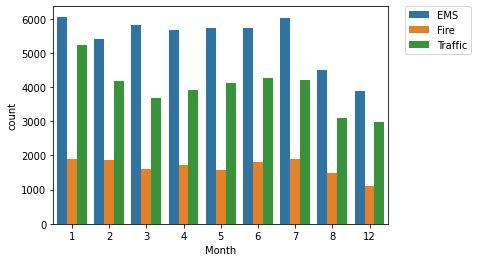

In [54]:
sns.countplot(x='Month', data = df, hue='cause')
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad = 0.)